In [2]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [3]:
#https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/
dataset = pd.read_csv('tweets-mg.csv')
#número de linhas
dataset.count()

Unnamed: 0                   8199
Created At                   8199
Text                         8199
Geo Coordinates.latitude      104
Geo Coordinates.longitude     104
User Location                5489
Username                     8199
User Screen Name             8199
Retweet Count                8199
Classificacao                8199
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     1
dtype: int64

In [4]:
#separar em classes
tweets = dataset['Text'].values
classes = dataset['Classificacao'].values

In [5]:
tweets

array(['���⛪ @ Catedral de Santo Antônio - Governador Valadares/MG https://t.co/JSbKamIqUJ',
       '� @ Governador Valadares, Minas Gerais https://t.co/B3ThIDJCSf',
       '�� @ Governador Valadares, Minas Gerais https://t.co/dPkgzVR2Qw',
       ...,
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia https://t.co/zaQbXRRJWc',
       'Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia: Um dos autores teria molestado vítima de… https://t.co/lQ8cTSNftA',
       'Trio suspeito de roubo de cargas é preso em Santa Luzia (MG) https://t.co/0INgJcMtZb #R7MG #RecordTVMinas'],
      dtype=object)

In [6]:
#Bag of words
vectorizer = CountVectorizer(analyzer='word')
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
freq_tweets

<8199x13031 sparse matrix of type '<class 'numpy.int64'>'
	with 128916 stored elements in Compressed Sparse Row format>

In [14]:
teste = ['Esse governo está no início, vamos ver o que vai dar',
        'Estou muito feliz com o governo de Minas esse ano',
        'O governador de Minas é do PT',
        'O estado de Minas decretou calamidade financeira']
freq_testes = vectorizer.transform(teste)
modelo.predict(freq_testes)

array(['Neutro', 'Neutro', 'Neutro', 'Negativo'], dtype='<U8')

In [16]:
#Avaliando o modelo
#Cross Validation
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [17]:
metrics.accuracy_score(classes, resultados)

0.8832784485912917

In [18]:
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes, resultados, sentimento),'')

              precision    recall  f1-score   support

    Positivo       0.95      0.88      0.91      3300
    Negativo       0.89      0.93      0.91      2446
      Neutro       0.80      0.84      0.82      2453

    accuracy                           0.88      8199
   macro avg       0.88      0.88      0.88      8199
weighted avg       0.89      0.88      0.88      8199
 


In [21]:
#matriz confusão
print(pd.crosstab(classes, resultados, rownames=['Real'],colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      2275     162         9  2446
Neutro         239    2068       146  2453
Positivo        45     356      2899  3300
All           2559    2586      3054  8199


In [24]:
#Bag of words com bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)
metrics.accuracy_score(classes, resultados)

0.8954750579338944

In [26]:
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes, resultados, sentimento),'')

              precision    recall  f1-score   support

    Positivo       0.97      0.88      0.92      3300
    Negativo       0.91      0.93      0.92      2446
      Neutro       0.80      0.89      0.84      2453

    accuracy                           0.90      8199
   macro avg       0.89      0.90      0.89      8199
weighted avg       0.90      0.90      0.90      8199
 


In [27]:
print(pd.crosstab(classes, resultados, rownames=['Real'],colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo      2265     179         2  2446
Neutro         181    2177        95  2453
Positivo        43     357      2900  3300
All           2489    2713      2997  8199


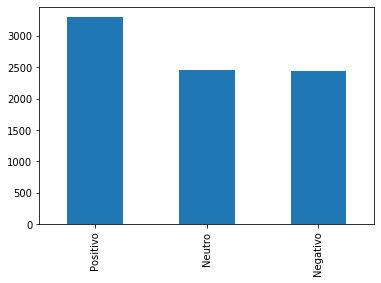

In [31]:
#analise dos dados
import matplotlib.pyplot as plt
%matplotlib inline

dataset['Classificacao'].value_counts().plot.bar()

In [9]:
#filtros
tweets_positivos = dataset[dataset['Classificacao']=='Positivo']

tweets_positivos['Text'].count()

3300

Text(0.5, 1.0, 'Classificação X Retweets')

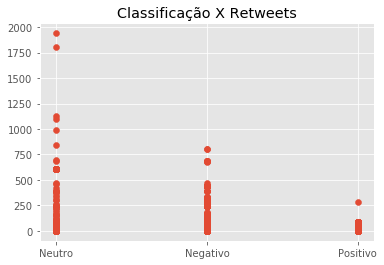

In [58]:
plt.style.use('ggplot')
plt.scatter(dataset['Classificacao'], dataset['Retweet Count'])
plt.title("Classificação X Retweets")

In [11]:
#cada palavra 
#wordslist = dataset["Text"].str.split()